# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:* Near zero maturity, $\displaystyle \frac{\partial C}{\partial t}$ is extremely large (blows up like $O(t^{-1/2})$, reflecting that almost all of a very short‐dated call’s value is time premium. As $t$ increases into the intermediate regime, theta decays roughly as $O(t^{-1/2})$, so each extra year of life adds progressively less value. Beyond roughly 2–3 years, $\displaystyle \frac{\partial C}{\partial t}$ flattens toward zero, indicating that very long‐dated calls have negligible marginal time value.


- *Call Option – Spot Price Sensitivity:* The S-shaped delta curve runs from near 0 ($S_0/K\ll 1$) through about 0.5 at the money ($S_0\approx K$), up to near 1 ($S_0/K\gg 1$). The steepest part of the transition occurs in the vicinity of $S_0\approx Ke^{-\frac{1}{2}\sigma^2t}$, where gamma—and thus spot sensitivity—is maximized. This highlights that hedging costs and P&L variability are greatest for near-ATM calls.

 
- *Put Option – Time Sensitivity:* For $r=0$, put-theta mirrors call-theta: a singular positive spike as $t\rightarrow 0$, rapid $O(t^{-1/2})$ decay in the mid-term, and a long-maturity plateau tending to zero. In nonzero-rate environments, one would also observe put-theta crossing to slight negativity at very long maturities, since the present-value drag on the strike can outweigh residual volatility value.

  
- *Put Option – Spot Price Sensitivity:* Put delta is a “reflected” S-shape: it runs from $-1$ ($S_0/K\ll 1$) through approximately $−0.5$ at $S_0\approx K$, to 0 ($S_0/K\gg 1$). The most rapid change in $\Delta_P$ again aligns with peak gamma at the money, underscoring that put hedging is most dynamic—and gamma risks are highest—when the option is ATM.

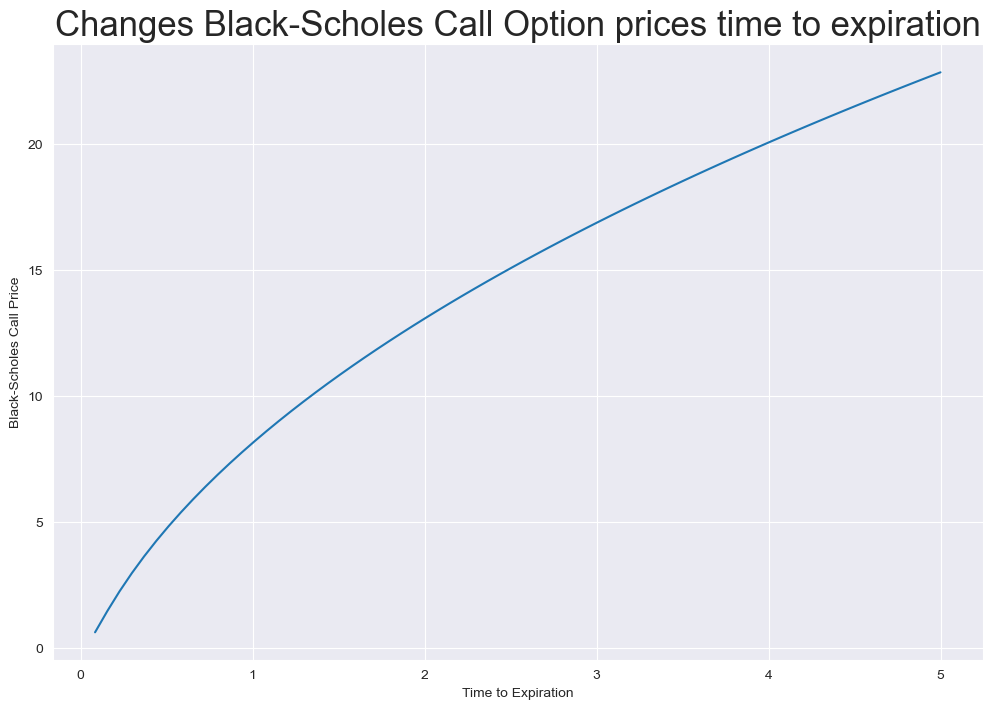

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
r=0
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

# a) Rate of change with respect to time for call

We can see that as the "time to expiration" increases, the call option price increases. This is expected: more time means more opportunity for the stock to rise above the strike which results in a higher value. However, the increase is concave — the rate of price increase diminishes over time.

Mathematically, the time‐decay (Theta) of a Black–Scholes call is

$$
\Theta_C=\frac{\partial C}{\partial t}=\frac{S_0\sigma}{2\sqrt{t}}\phi(d_1)+rKe^{-rt}\Phi(d_2)
$$

where $\phi$ and $\Phi$ are the standard normal PDF and CDF, and


$$
d_1 = \frac{\ln\left(\frac{S(0)}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)t}{\sigma \sqrt{t}}, \qquad
d_2 = d_1 - \sigma \sqrt{t}.
$$
 
From this one sees immediately:

- Short‐time singularity:

    As $t\rightarrow 0^+$, the $-\frac{S_0\sigma}{2\sqrt{t}}\phi(d_1)$ term dominates, diverging like $-O(t^{-1/2})$. This reflects that when expiration is imminent, a marginal extension of life dramatically inflates the call’s time value.


- Intermediate‐term decline:

    For $t$ in the order of $(\sigma^2)^{-1}$, both terms are comparable. Numerically one observes a smooth decrease of $\Theta_C$, since $\phi(d_1)$ falls as $\sqrt{t}$ grows while the $rKe^{-rt}\Phi(d_2)$ piece also decays.


- Long‐maturity asymptote:

    As $t\rightarrow \infty$,


$$
d_1\sim \frac{1}{2}\sigma\sqrt{t}\qquad \text{ and } \qquad\phi(d_1)\sim \frac{1}{2\pi}e^{-\sigma^2t/8}
$$

So the term $\frac{S_0\sigma}{2\sqrt{t}}\phi(d_1)\rightarrow 0$ exponentially fast, and $\Phi(d_2)\rightarrow 1$. Hence $\Theta_C\rightarrow rKe^{-rt}$, which for $r=0$ tends to 0. Thus very long‐dated calls have negligible marginal time value.

**Observation:** The greek $\Theta$ is usually defined as the negatice of the rate of change with respect to time for call, by convenience I am just working with the rate of change instead of the actual $\Theta$

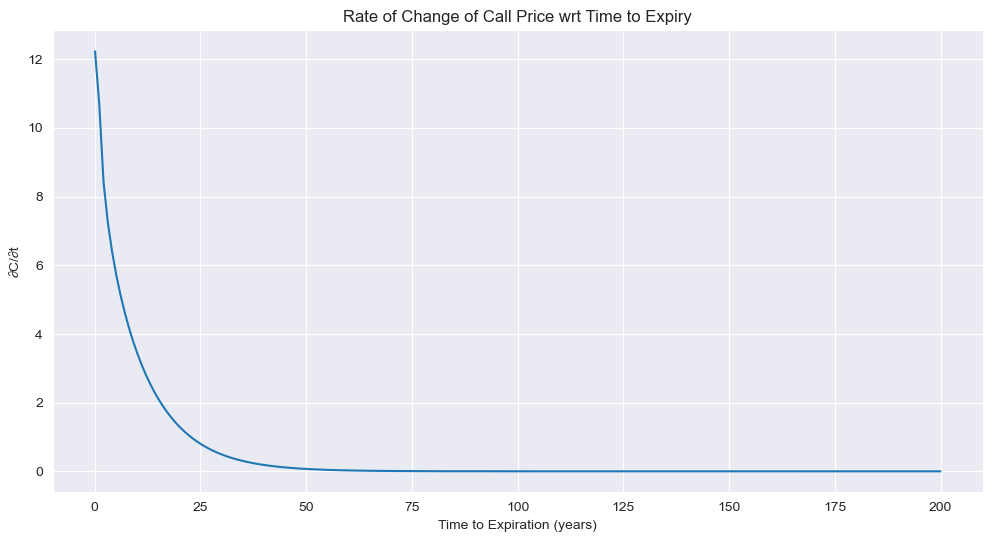

In [112]:
# Part (a): Rate of change wrt time for call
times = np.linspace(1/12, 200, 200)
call_prices = [bs_call(100, K, sigma, t, r) for t in times]
call_theta = np.gradient(call_prices, times)

plt.figure(figsize=(12, 6))
plt.plot(times, call_theta)
plt.title('Rate of Change of Call Price wrt Time to Expiry')
plt.xlabel('Time to Expiration (years)')
plt.ylabel('∂C/∂t')
plt.show()

The plot shows:

- Very steep initial slope when $t$ is just above zero. A tiny addition of time to expiration on a nearly-expired option boosts its price the most.

- Rapid decay in that slope as $t$ grows: once you’ve moved past the first few months, each extra year of life adds progressively less to the call’s value.

- Long-maturity plateau: beyond 2–3 years, $\displaystyle \frac{\partial C}{\partial t}$ flattens out to a small, nearly constant positive value.

Intuition:

- When there’s almost no time left, the option’s only value is its remaining extrinsic/time value—so “buying” a bit more time is enormously valuable.

- As maturity extends, volatility already has plenty of time to play out, so additional time adds diminishing marginal benefit.

# b) Rate of change with respect to spot price for call (Delta)

When we hold time to expiration, strike, volatility and interest rate constant, the only thing that moves the call’s value is the underlying stock price $S_0$. To quantify exactly how much a small change in $S_0$ affects the option, we turn to the Greek called Delta, defined for a European call as

$$
\Delta_C=\frac{\partial C}{\partial S_0}=\Phi(d_1)
$$

Delta tells us “for each dollar move in the stock, how many dollars does the call move?” It ranges from 0 (far out-of-the-money) through 0.5 at the money, up to 1 (deep in the money), producing the familiar S-shaped curve. Plotting both the call price $C(S_0)$ and its slope $\Delta_C$ against $S_0$ gives a clear visual of this transition from negligible sensitivity to full sensitivity as the option moves through the strike.

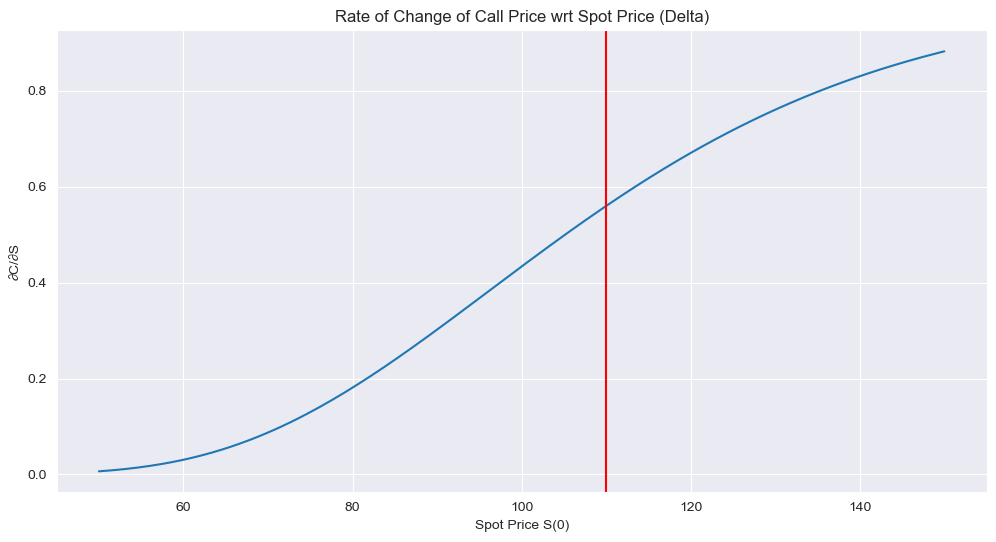

In [88]:
# Part (b): Rate of change wrt spot price for call (Delta)
S0s = np.linspace(50, 150, 200)
t=1
call_delta = [norm.cdf((np.log(S0/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))) for S0 in S0s] #At time t=1

plt.figure(figsize=(12,6))
plt.plot(S0s, call_delta)
plt.axvline(K, color='red')
plt.title('Rate of Change of Call Price wrt Spot Price (Delta)')
plt.xlabel('Spot Price S(0)')
plt.ylabel('∂C/∂S')
plt.show()

Call Option – Spot Price Sensitivity ($\displaystyle\frac{\partial C}{\partial S_0}$)

Looking at the delta curve we generated for a one-year call ($t=1$):

- Deep out-of-the-money ($S0\ll𝐾$) $\displaystyle\frac{\partial C}{\partial S_0}$ is almost zero. When the spot is far below the strike, the call is unlikely to finish in the money, so its price barely moves with small changes in $S_0$

- Around the strike ($S_0\approx K$), Delta climbs most steeply here, passing through about 0.5 at $S_0=K=110$. This “middle” region is where the option is most responsive to spot—each dollar move in the underlying translates to roughly a 0.5 dollars move in the call’s value.

- Deep in-the-money ($S_0\gg K$), $\displaystyle\frac{\partial C}{\partial S_0}$ approaches 1. Once the call is almost certain to be exercised, it behaves like holding the underlying itself—each additional dollar in $S_0$ adds nearly a dollar to the call price.

In summary, the “S-shaped” delta curve reflects the transition from virtually no sensitivity when deeply out-of-the-money, through a steep region around the strike, to full sensitivity in the deep in-the-money regime.

# Rate of change with respect to time for put

Similar to call options, put options gain value with more time to expiration, especially when they are out-of-the-money. However, their behavior is not identical — we'll examine this by plotting the put price over a range of expiration times.

Mathematically, we have that the theta of a European put in Black-Scholes form:

$$
\Theta_P=\frac{\partial P}{\partial t}=\frac{S_0\sigma}{2\sqrt{t}}\phi(d_1)-rKe^{-rt}\Phi(-d_2)
$$


- Short-time singularity:

  As $t\rightarrow 0^+$, the first term $\frac{S_0\sigma}{2\sqrt{t}}\phi(d_1)$ blows up like $O(t^{-1/2})$. intuitively, as expiration nears, almost all of a put’s value is time value; “buying” an infinitesimal amount of time yields an unbounded incremental price gain.


- Intermediate regime:

    Both the Gaussian‐density term and the interest‐rate term are $O(1)$. Numerically, $\Theta_P$ is large and positive for short maturities, then decays roughly like $O(t^{-1/2})$ once you move beyond the very‐short window.


- Long-maturity asymptote:

  As $t\rightarrow \infty$, one shows $\phi(d_1)\rightarrow 0$ exponentially, so the first term vanishes. Meanwhile $\Phi(-d_2)\rightarrow 1$ if $r\geq \frac{1}{2}\sigma^2$ (or to 0 otherwise), so the second term goes to $-rKe^{-rt}$. For $r=0$, $\Theta_P\rightarrow 0^+$, just like the call. For $r>0$ one can even observe $\Theta_P$ crossing through zero and eventually becoming slightly negative, since the present‐value drag on $K$ outweighs any residual time‐value. In practice, most puts maintain positive theta for typical interest‐rate/volatility regimes.



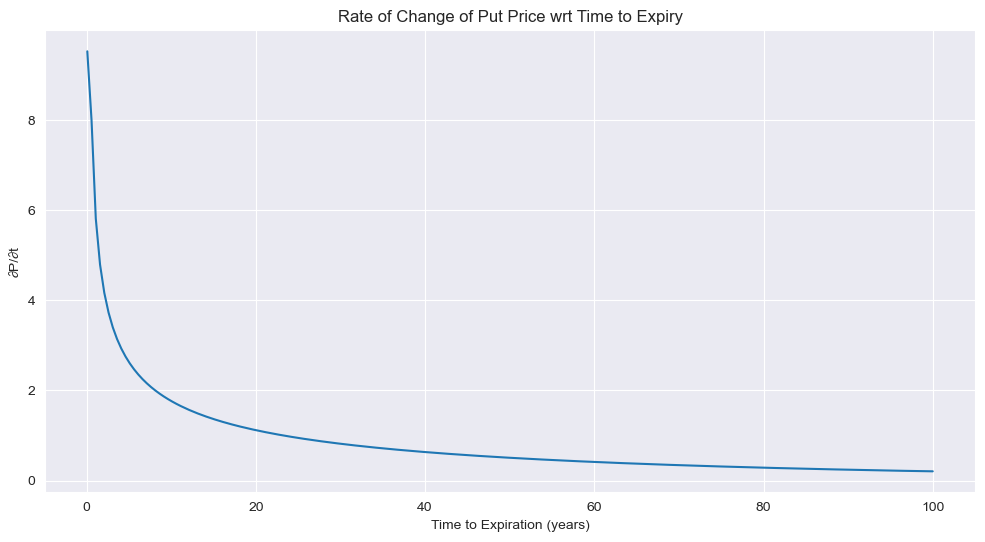

In [125]:
# Part (c): Rate of change wrt time for put
times = np.linspace(1/12, 100, 200)
put_prices = [bs_put(100, K, sigma, t, r) for t in times]
put_theta = np.gradient(put_prices, times)

plt.figure(figsize=(12,6))
plt.plot(times, put_theta)
plt.title('Rate of Change of Put Price wrt Time to Expiry')
plt.xlabel('Time to Expiration (years)')
plt.ylabel('∂P/∂t')
plt.show()

The put‐theta plot exhibits the same three‐phase behavior—only now it’s the time‐sensitivity of the put’s extrinsic value:

- Very steep initial slope when $t$ is just above zero. A tiny addition of time to expiration on a nearly‐expired put boosts its price enormously (the curve shoots up into the 8–10 range for $t\approx 0.01$ yr).

- Rapid decay in that slope as $t$ grows. Once you’re past the very short-dated region (say beyond 1–2 months), $\displaystyle\frac{\partial P}{\partial t}$ falls off quickly—from around 10 down to roughly 1 by the 1-year mark.

- Long-maturity plateau beyond 2–3 years. After a few years, $\displaystyle\frac{\partial P}{\partial t}$ levels out at a small positive value (around 0.3–0.4), and for extremely long maturities would asymptote toward zero.



Intuition: 

- Extrinsic dominance at short maturities: A put that’s about to expire either pays off immediately or is worthless—there’s no “latitude” for future moves. Adding an extra instant of life thus carries enormous optionality value.

- Diminishing marginal benefit: Once an option already has ample life for price swings to occur, giving it still more time yields progressively smaller incremental probabilities of deeper in- or out-of-the-money moves.

- Symmetry with calls (at $r=0$): Under zero interest rates, put and call theta are identical in shape. Only when $r> do puts eventually begin to suffer time-decay (negative theta) as the PV of the strike dominates.

With a positive $r=0.1$ we have:

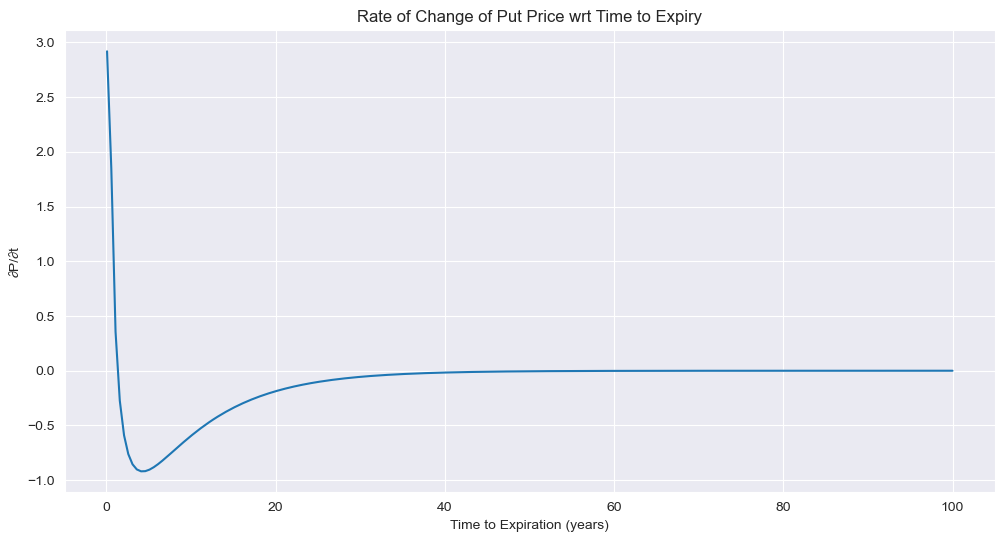

In [128]:
times = np.linspace(1/12, 100, 200)
put_prices = [bs_put(100, K, sigma, t, 0.1) for t in times]
put_theta = np.gradient(put_prices, times)

plt.figure(figsize=(12,6))
plt.plot(times, put_theta)
plt.title('Rate of Change of Put Price wrt Time to Expiry')
plt.xlabel('Time to Expiration (years)')
plt.ylabel('∂P/∂t')
plt.show()

# Rate of change with respect to spot price for put (Delta)


When we hold time to expiration, strike, volatility and interest rate constant, the only thing that moves the put’s value is the underlying stock price $S_0$. To quantify exactly how much a small change in $S_0$ affects the option, we turn to the Greek called Delta, defined for a European put as $\Delta_P=\displaystyle \frac{\partial P}{\partial S_0}=\Phi(d_1)-1=-\Phi(-d_1)$.

Delta tells us “for each dollar move in the stock, how many dollars does the put move?” It ranges from $−1$ (deep in‐the‐money) through about $−0.5$ at the money, up to 0 (deep out‐of‐the‐money), yielding a reflected S-shaped curve. Plotting both the put price $P(S_0)$ and its slope $\Delta_P$ against $S_0$ makes clear the transition from full negative sensitivity (∆≈–1) to negligible sensitivity (∆≈0) as the option moves through the strike.

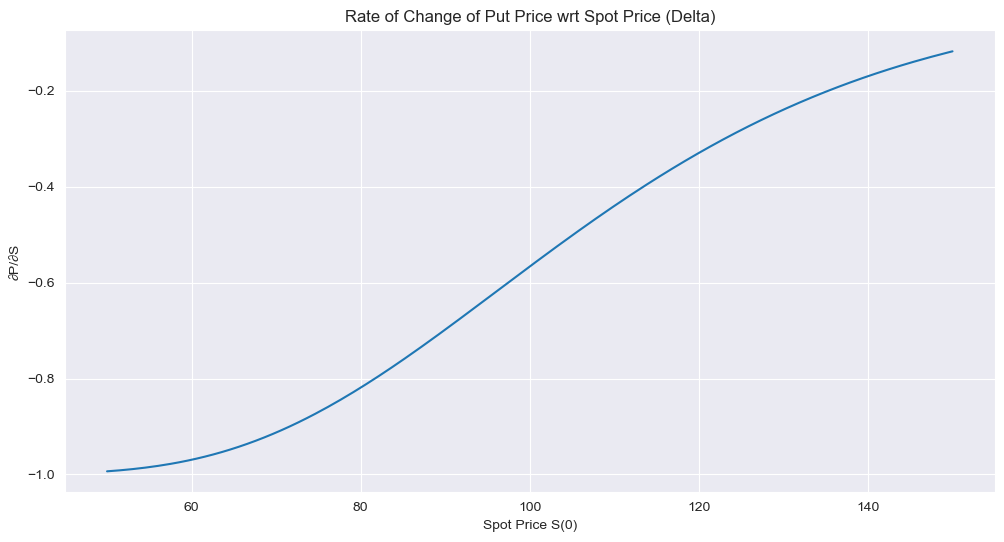

In [136]:
 #Rate of change wrt spot price for put (Delta)
r=0
put_delta = [norm.cdf((np.log(S0/K) + (r + 0.5 * sigma**2) * 1) / (sigma * np.sqrt(1))) - 1 for S0 in S0s]

plt.figure(figsize=(12,6))
plt.plot(S0s, put_delta)
plt.title('Rate of Change of Put Price wrt Spot Price (Delta)')
plt.xlabel('Spot Price S(0)')
plt.ylabel('∂P/∂S')
plt.show()

The put‐delta plot shows:

- Deep in-the-money ($S_0\ll K$) $\displaystyle \frac{\partial P}{\partial S_0}\approx -1$. When the spot is far below the strike, the put behaves like a short share—each dollar increase in $S_0$ reduces the put’s value by almost one dollar.

- Around the strike ($S_0\approx K$). Delta climbs most steeply here, passing through about $−0.5$ at $S_0=K=110$. In this “ATM” region the put is most responsive—each dollar move in the underlying translates to roughly a half dollar move in the put’s price (in absolute terms).

- Deep out-of-the-money ($S_0\gg K$) $\displaystyle \frac{\partial P}{\partial S_0}\rightarrow 0$. Once the put is very unlikely to finish in the money, its price barely shifts when $S_0$ moves.

Intuition:

- ITM puts act like a short stock position, so they track the underlying one-for-one (delta $\approx –1$).

- ATM puts have the highest curvature (gamma), hence the steepest change in delta occurs right around the strike.

- OTM puts carry almost no intrinsic value, so small changes in the underlying have negligible effect (delta $\approx 0$).